# Trabajo final – Manejo y visualización de datos con Python (ENAHO 2024 – Sumaria)

**Curso:** Fundamentos de programación en Python para las Ciencias Sociales  
**Base de datos:** ENAHO 2024 – Módulo Sumaria (INEI)  

## Introducción

El presente trabajo tiene como objetivo aplicar las herramientas básicas de programación en Python vistas en clases. Para ello, se utiliza la base de datos ENAHO 2024 – Módulo Sumaria, elaborada por el Instituto Nacional de Estadística e Informática (INEI), la cual contiene información relevante sobre las condiciones económicas y sociales de los hogares en el Perú.
Asimismo, a lo largo del notebook se realiza un proceso de limpieza y transformación de la base de datos, incluyendo la creación de nuevas variables a partir de la información original mediante funciones definidas por la estudiante. Posteriormente, se emplean dataframes y gráficos para explorar la relación entre pobreza, ingresos y gastos de los hogares. ☝


## 1. Librerías y carga de datos


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

modulo34 = pd.read_csv("Sumaria-2024.csv", encoding="latin-1")

modulo34.columns = modulo34.columns.str.lower()

modulo34.head()

,año,mes,conglome,vivienda,hogar,ubigeo,dominio,estrato,mieperho,totmieho,...,estrsocial,ld,linpe,linea,pobreza,factor07,lineav,pobrezav,nconglome,sub_conglome
0,2024,1,15009,13,11,10101,4,4,2,2,...,4,0.815806,231.437622,382.024597,3,79.816757,672.335510,4,7098,0
1,2024,1,15009,47,11,10101,4,4,3,3,...,4,0.815806,231.437622,382.024597,3,79.816757,684.988831,4,7098,0
2,2024,1,15009,59,11,10101,4,4,1,1,...,4,0.815806,231.437622,382.024597,3,79.816757,705.972351,4,7098,0
3,2024,1,15009,71,11,10101,4,4,2,2,...,4,0.815806,231.437622,382.024597,3,79.816757,703.466370,4,7098,0
4,2024,1,15009,84,11,10101,4,4,5,5,...,4,0.815806,231.437622,382.024597,3,79.816757,686.349243,3,7098,0


## 2. Exploración rápida de la base

En esta sección se revisan dimensiones, nombres de columnas y valores faltantes (de manera descriptiva).


In [2]:
modulo34.shape

list(modulo34.columns)[:40]

['año',
 'mes',
 'conglome',
 'vivienda',
 'hogar',
 'ubigeo',
 'dominio',
 'estrato',
 'mieperho',
 'totmieho',
 'percepho',
 'ia01hd',
 'ia02hd',
 'ig03hd1',
 'ig03hd2',
 'ig03hd3',
 'ig03hd4',
 'ga03hd',
 'ga04hd',
 'sg23',
 'sig24',
 'sg25',
 'sig26',
 'sg27',
 'sig28',
 'sg42',
 'sg421',
 'sg422',
 'sg423',
 'sg42d',
 'sg42d1',
 'sg42d2',
 'sg42d3',
 'ingbruhd',
 'ingnethd',
 'pagesphd',
 'ingindhd',
 'ingauthd',
 'insedthd',
 'insedlhd']

In [3]:
vars_clave = ["conglome","vivienda","hogar","ubigeo","pobreza","inghog2d","gashog2d","mieperho","percepho"]
faltantes = (modulo34[vars_clave].isna().mean() * 100).round(2)
faltantes

,0
conglome,0.0
vivienda,0.0
hogar,0.0
ubigeo,0.0
pobreza,0.0
inghog2d,0.0
gashog2d,0.0
mieperho,0.0
percepho,0.0


## 3. Limpieza y transformación de datos (data wrangling)


In [4]:
def preparar_sumaria(df):
    df = df.copy()

    # 1) Asegurar tipo numérico
    cols_numericas = ["mieperho", "percepho", "inghog2d", "gashog2d", "pobreza"]
    for col in cols_numericas:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # 2) Variables derivadas
    df["dependientes"] = df["mieperho"] - df["percepho"]
    df["ingreso_mensual_por_perceptor"] = (df["inghog2d"] / 12) / df["percepho"]
    df["diferencia_ingreso_gasto"] = df["inghog2d"] - df["gashog2d"]

    # 3) Recodificación de pobreza
    dic_pobreza_detalle = {1: "pobre extremo", 2: "pobre no extremo", 3: "no pobre"}
    dic_pobreza_simple  = {1: "pobre", 2: "pobre", 3: "no pobre"}

    df["pobreza_detalle"] = df["pobreza"].map(dic_pobreza_detalle)
    df["pobreza_simple"]  = df["pobreza"].map(dic_pobreza_simple)

    # 4) Departamento desde ubigeo
    df["ubigeo"] = df["ubigeo"].astype(str)
    df["departamento"] = df["ubigeo"].str[:2].astype(int)

    return df

In [5]:
df = preparar_sumaria(modulo34)

# Vamos a revisar las columnas creadas
df[["pobreza", "pobreza_detalle", "pobreza_simple", "dependientes",
    "ingreso_mensual_por_perceptor", "diferencia_ingreso_gasto", "departamento"]].head()

,pobreza,pobreza_detalle,pobreza_simple,dependientes,ingreso_mensual_por_perceptor,diferencia_ingreso_gasto,departamento
0,3,no pobre,no pobre,0,2173.442057,17974.390625,10
1,3,no pobre,no pobre,1,1701.335124,667.097656,10
2,3,no pobre,no pobre,0,1258.208089,2789.658203,10
3,3,no pobre,no pobre,0,1711.789714,10766.228516,10
4,3,no pobre,no pobre,3,1985.798340,14582.250000,10


## 4. Tablas descriptivas

Para contextualizar los gráficos.


In [6]:
# Conteo de hogares por nivel de pobreza
df["pobreza_detalle"].value_counts(dropna=False)

,count
pobreza_detalle,
no pobre,26879
pobre no extremo,5224
pobre extremo,1588


In [7]:
# Ingreso anual promedio del hogar por nivel de pobreza (monetario)
df.groupby("pobreza_detalle")["inghog2d"].mean().round(2)

,inghog2d
pobreza_detalle,
no pobre,42135.52
pobre extremo,13686.59
pobre no extremo,22956.10


## 5. Graficamos

Se presentan 2 gráficos:
1) Ingreso mensual promedio por perceptor según nivel de pobreza (barras).  
2) Distribución de la diferencia ingreso–gasto anual por nivel de pobreza (boxplot).  


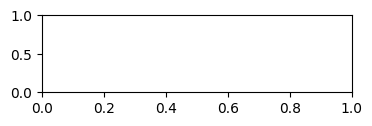

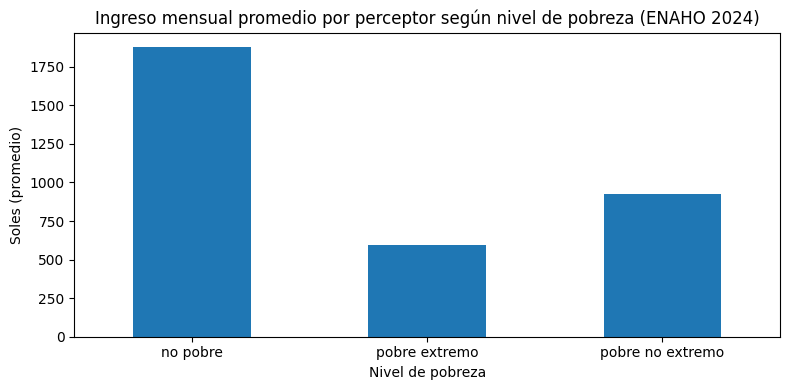

In [10]:
# 1) Ingreso mensual promedio por perceptor (promedio) por pobreza
df_ing = df[df["percepho"] > 0]

tabla_ing = (
    df_ing
    .groupby("pobreza_detalle")["ingreso_mensual_por_perceptor"]
    .mean()
)

plt.figure(figsize=(8,4))
tabla_ing.plot(kind="bar")
plt.title("Ingreso mensual promedio por perceptor según nivel de pobreza (ENAHO 2024)")
plt.ylabel("Soles (promedio)")
plt.xlabel("Nivel de pobreza")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

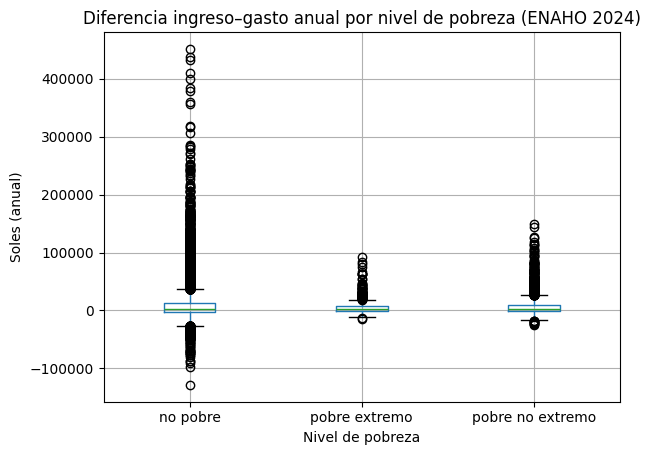

In [9]:
# 2) Diferencia ingreso-gasto (anual) por pobreza (boxplot)
sub = df[["pobreza_detalle", "diferencia_ingreso_gasto"]].dropna()

plt.figure(figsize=(8,4))
sub.boxplot(column="diferencia_ingreso_gasto", by="pobreza_detalle")
plt.title("Diferencia ingreso–gasto anual por nivel de pobreza (ENAHO 2024)")
plt.suptitle("")  # quita el título automático de pandas
plt.ylabel("Soles (anual)")
plt.xlabel("Nivel de pobreza")
plt.tight_layout()
plt.show()

## 8. Comentarios finales

A partir de la ENAHO 2024 (Sumaria), se realizaron transformaciones básicas y visualizaciones descriptivas. Asimismo, los resultados permiten observar diferencias sistemáticas en ingresos y en el balance ingreso–gasto entre niveles de pobreza.
